In [183]:
import re
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load MOS from the GENEA evaluation

In [184]:
labels_path = "../Dataset/Appropriateness_Labels/mean_opinion_scores.csv"
YY_app = pd.read_csv(labels_path)
app_index = [x for x in range(0,20)] + [x for x in range (80,100)] + [x for x in range(240,260)]
YY_app = YY_app.iloc[app_index,:]

labels_path = "../Dataset/Human_Likeness_Labels/mean_opinion_scores.csv"
YY_hl = pd.read_csv(labels_path)
hl_index = [x for x in range(0,20)] + [x for x in range (80,100)] + [x for x in range(200,220)]
YY_hl = YY_hl.iloc[hl_index,:]

In [185]:
# Return Scores in Order: BA, N, New, SC
def parse_text_file(path):
    f = open(path, 'r')
    lines = f.readlines()
    lines = [re.findall(r'\d+', x) for x in lines]
    lines = [int(num) for num_list in lines for num in num_list]
    lines = np.asarray(lines)
    return lines

In [186]:
def parse_participant_scores(participant_path, survey):
    scores = []
    for i in range(1,21):
        path = participant_path + '/StudySeq' + str(i) + '_' + survey + '.txt'
        scores = scores + [parse_text_file(path)] 
    scores = np.asarray(scores)
    return scores

In [187]:
def compare_scores_with_mos_mse(scores, YY):
    scores = np.append(np.append(scores[:,0],scores[:,1]),scores[:,-1])
    mse = mean_squared_error(YY.iloc[:,1].values, scores)
    return mse

In [188]:
def compare_scores_with_mos_mae(scores, YY):
    scores = np.append(np.append(scores[:,0],scores[:,1]),scores[:,-1])
    mae = mean_absolute_error(YY.iloc[:,1].values, scores)
    return mae

# Converting survey data to a separate dataset and comparing with GENEA dataset

In [189]:
participant_list = [x for x in range(1,11)]
scores_list = []
for i in participant_list:
    participant = 'Participant ' + str(i)
    scores = parse_participant_scores(participant, 'app')
    scores_list = scores_list + [scores]
scores_list = np.asarray(scores_list)
scores = np.mean(scores_list, axis = 0)
survey_dataset_app = np.append(np.append(scores[:,0],scores[:,1]),scores[:,-1])
mse = mean_squared_error(survey_dataset_app, YY_app.iloc[:,1].values)
print('MSE of MOS from both datasets', mse)

MSE of MOS from both datasets 70.11226048444091


In [190]:
participant_list = [x for x in range(1,11)]
scores_list = []
for i in participant_list:
    participant = 'Participant ' + str(i)
    scores = parse_participant_scores(participant, 'hl')
    scores_list = scores_list + [scores]
scores_list = np.asarray(scores_list)
scores = np.mean(scores_list, axis = 0)
survey_dataset_hl = np.append(np.append(scores[:,0],scores[:,1]),scores[:,-1])
mse = mean_squared_error(survey_dataset_hl, YY_hl.iloc[:,1].values)
print('MSE of MOS from both datasets', mse)

MSE of MOS from both datasets 102.25340829147775


# Treating participants as models and evaluating their errors

Participant MSE Graph for Appropriateness

Mean MSE:  333.2319271511076


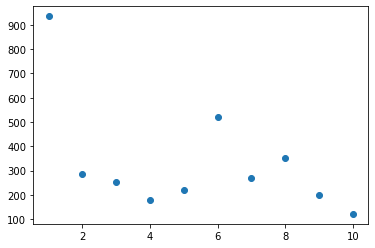

In [191]:
participant_list = [x for x in range(1,11)]
mse_list = []
for i in participant_list:
    participant = 'Participant ' + str(i)
    scores = parse_participant_scores(participant, 'app')
    mse = compare_scores_with_mos_mse(scores, YY_app)
    mse_list = mse_list + [mse]
    
plt.scatter(participant_list, mse_list)
print('Mean MSE: ', np.mean(mse_list))

Mean MAE:  14.549942294799497


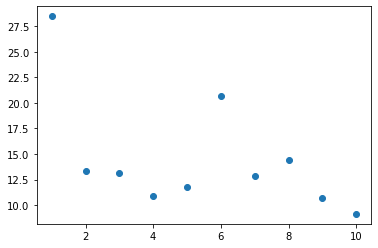

In [192]:
participant_list = [x for x in range(1,11)]
mae_list = []
for i in participant_list:
    participant = 'Participant ' + str(i)
    scores = parse_participant_scores(participant, 'app')
    mae = compare_scores_with_mos_mae(scores, YY_app)
    mae_list = mae_list + [mae]
    
plt.scatter(participant_list, mae_list)
print('Mean MAE: ', np.mean(mae_list))

Participant MSE Graph for Human-Likeness

Mean MSE:  552.5625749581445


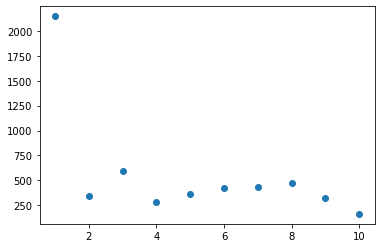

In [193]:
participant_list = [x for x in range(1,11)]
mse_list = []
for i in participant_list:
    participant = 'Participant ' + str(i)
    scores = parse_participant_scores(participant, 'hl')
    mse = compare_scores_with_mos(scores, YY_hl)
    mse_list = mse_list + [mse]
    
plt.scatter(participant_list, mse_list)
print('Mean MSE: ', np.mean(mse_list))

Mean MAE:  18.643434541457445


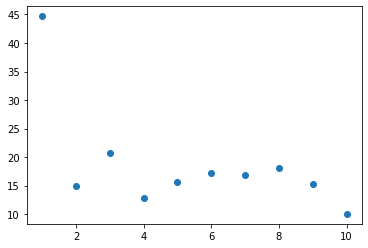

In [194]:
participant_list = [x for x in range(1,11)]
mae_list = []
for i in participant_list:
    participant = 'Participant ' + str(i)
    scores = parse_participant_scores(participant, 'hl')
    mae = compare_scores_with_mos_mae(scores, YY_hl)
    mae_list = mae_list + [mae]
    
plt.scatter(participant_list, mae_list)
print('Mean MAE: ', np.mean(mae_list))

# Compile GENEA data and survey data into a single dataset

In [195]:
labels_path = "../Dataset/Appropriateness_Labels/participants_counts.csv"
YY_app_counts = pd.read_csv(labels_path)
app_index = [x for x in range(0,20)] + [x for x in range (80,100)] + [x for x in range(240,260)]
YY_app_counts = YY_app_counts.iloc[app_index,:]

labels_path = "../Dataset/Human_Likeness_Labels/participants_counts.csv"
YY_hl_counts = pd.read_csv(labels_path)
hl_index = [x for x in range(0,20)] + [x for x in range (80,100)] + [x for x in range(200,220)]
YY_hl_counts = YY_hl_counts.iloc[hl_index,:]

In [196]:
genea_mos_frac = YY_hl.iloc[:,1] * (YY_hl_counts.iloc[:,1]/(YY_hl_counts.iloc[:,1]+10))
survey_mos_frac = survey_dataset_hl * (10/(YY_hl_counts.iloc[:,1]+10))
combined_dataset_hl = genea_mos_frac + survey_mos_frac
print('MSE between combined dataset and GENEA dataset: ', mean_squared_error(combined_dataset_hl, YY_hl.iloc[:,1]))
print('MSE between combined dataset and survey dataset: ', mean_squared_error(combined_dataset_hl, survey_dataset_hl))

MSE between combined dataset and GENEA dataset:  7.650156966981948
MSE between combined dataset and survey dataset:  54.16987287508549


In [197]:
genea_mos_frac = YY_app.iloc[:,1] * (YY_app_counts.iloc[:,1]/(YY_app_counts.iloc[:,1]+10))
survey_mos_frac = survey_dataset_app * (10/(YY_app_counts.iloc[:,1]+10))
combined_dataset_app = genea_mos_frac + survey_mos_frac
print('MSE between combined dataset and GENEA dataset: ', mean_squared_error(combined_dataset_app, YY_app.iloc[:,1]))
print('MSE between combined dataset and survey dataset: ', mean_squared_error(combined_dataset_app, survey_dataset_app))

MSE between combined dataset and GENEA dataset:  4.858706981867623
MSE between combined dataset and survey dataset:  38.18804017385262


# Save the Combined and Survey Labels to csv filels

In [205]:
YY_survey_hl = YY_hl.copy()
YY_survey_hl.iloc[:,1] = survey_dataset_hl 
YY_survey_hl.to_csv('../Dataset/Human_Likeness_Labels/survey_labels.csv', index=False)

YY_combined_hl = YY_hl.copy()
YY_combined_hl.iloc[:,1] = combined_dataset_hl
YY_combined_hl.to_csv('../Dataset/Human_Likeness_Labels/combined_labels.csv', index=False)

YY_survey_app = YY_app.copy()
YY_survey_app.iloc[:,1] = survey_dataset_app
YY_survey_app.to_csv('../Dataset/Appropriateness_Labels/survey_labels.csv', index=False)

YY_combined_app = YY_app.copy()
YY_combined_app.iloc[:,1] = combined_dataset_app
YY_combined_app.to_csv('../Dataset/Appropriateness_Labels/combined_labels.csv', index=False)